In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(1, '/scr/gmachi/prospection/K2/src')

from utils import deserialize, visualize_cell_graph

# Data example

In [3]:
label_path = "/scr/biggest/gmachi/datasets/celldive_lung/processed/label_dict.obj"
label_dict = deserialize(label_path)

In [4]:
# label_dict

In [5]:
id=7
G = "/scr/biggest/gmachi/datasets/celldive_lung/for_ml/for_prospect_final/S" + str(id) + ".obj"
G = deserialize(G)

In [6]:
label_dict[id]

1

min/max values: 1.0 2.0
using extended colormap
unique cell types: [1.0, 2.0]


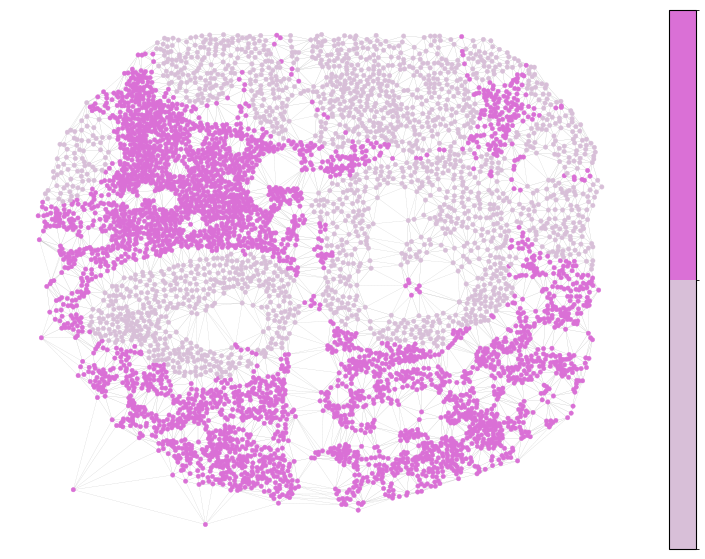

In [9]:
_ = visualize_cell_graph(G)

# Create a Processor

In [10]:
from k2 import K2Processor

In [11]:
embeds_path = "/scr/biggest/gmachi/datasets/celldive_lung/embed_sample_final.obj"
celltype_path = "/scr/biggest/gmachi/datasets/celldive_lung/celltype_sample_final.obj"

In [12]:
proc_args = {"datatype":"cells",
        "k":20,
        "quantizer_type": "kmeans",
        "embeddings_path": embeds_path,
        "embeddings_type": "multidict",
        "mapping_path": None,
        "sample_size": 10160,
        "sample_scheme": "random",
        "dataset_path": None,
        "verbosity": "full",
        "so_dict_path": None,
        "mapping_path": celltype_path,
        "marker_flag": "types"}

Embeddings path provided, loading embeddings...
Chosen KMeans model for quantization...
total embeds: 10160
collapsing from dim 512 --> 2


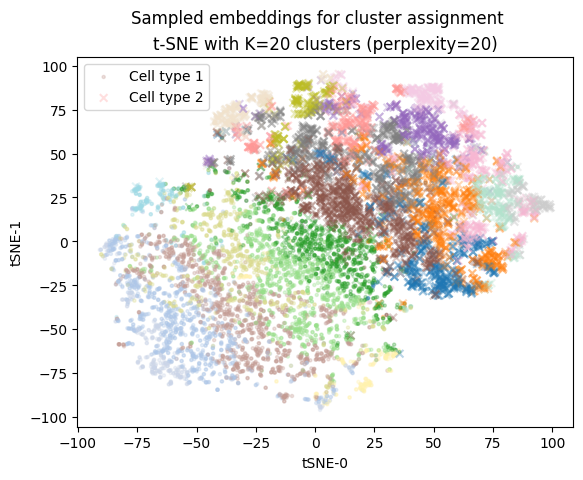

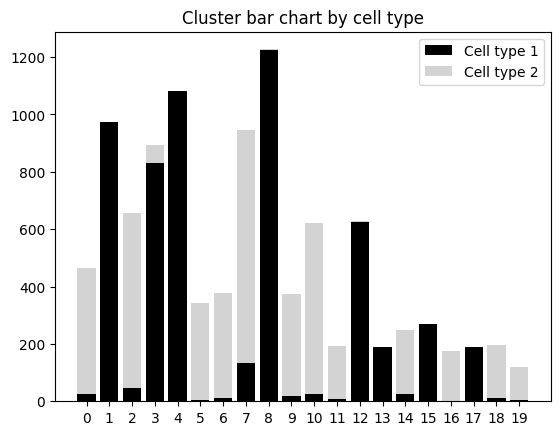

In [13]:
proc = K2Processor(proc_args)
proc.fit_quantizer()
proc.visualize_quantizer()

## Generating sprites
Sprites are the collection of concept psuedolabels

In [14]:
from utils import construct_sprite
S = construct_sprite(G, proc, key_in="emb", key_out="concept")

min/max values: 1 19
using extended colormap
unique cell types: [1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 14, 15, 16, 19]


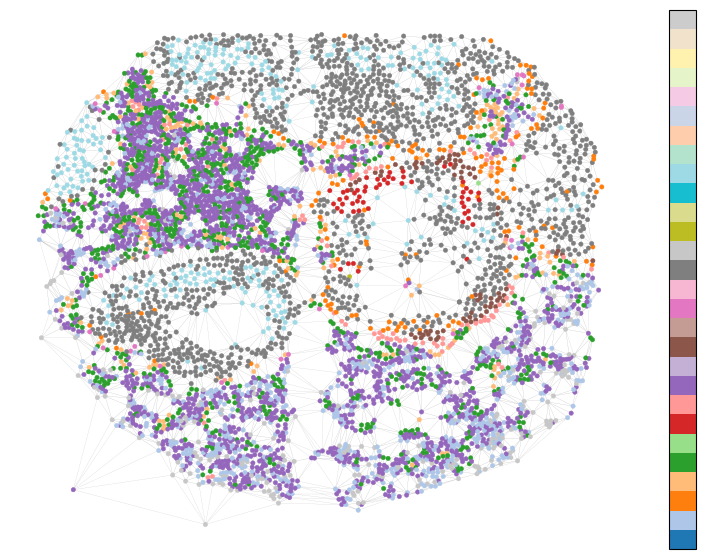

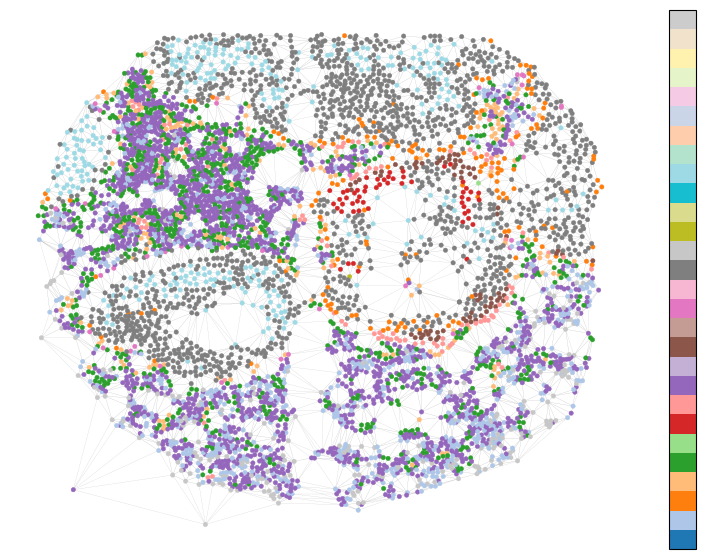

In [ ]:
_ = visualize_cell_graph(S, key="concept", node_colors=None)

# Train a prospector model

In [17]:
from k2 import K2Model

In [18]:
label_path = "/scr/biggest/gmachi/datasets/celldive_lung/processed/label_dict.obj"
label_dict = deserialize(label_path)

G_dir = "/scr/biggest/gmachi/datasets/celldive_lung/for_ml/for_prospect_final/"


In [19]:
hparams = {"alpha": 1e10, "tau": 0, "lambda": 0.5}
model_args = {"modality": "cells",
        "processor": proc,
        "r":1,
        "variant": "inferential",
        "hparams": hparams,
        "train_graph_path": G_dir,
        "train_label_dict": label_dict}

note: below cell takes 34min to run with 30gb ram

In [20]:
k2m = K2Model(model_args)

In [21]:
k2m.create_train_array()

In [22]:
k2m.fit_kernel()

Differential Expression with alpha,tau: 10000000000.0,0


In [23]:
# from utils import serialize_model
# serialize_model(k2m, "k2model.obj")

In [24]:
# from utils import deserialize_model
# k2m = deserialize_model("k2model.obj")

<BarContainer object of 230 artists>

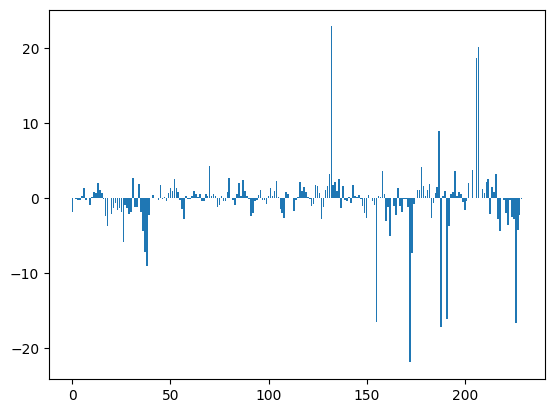

In [25]:
import matplotlib.pyplot as plt
plt.bar(x=range(len(k2m.B)), height=list(k2m.B))

In [26]:
P = k2m.prospect(G)

Displaying motif graph with log10 scaling


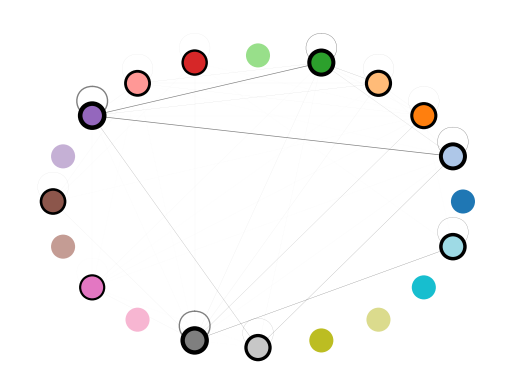

In [27]:
k2m.visualize_motif_graph(G)

No G provided, showing model-wide kernel hash-graph
Displaying motif graph with log2 scaling


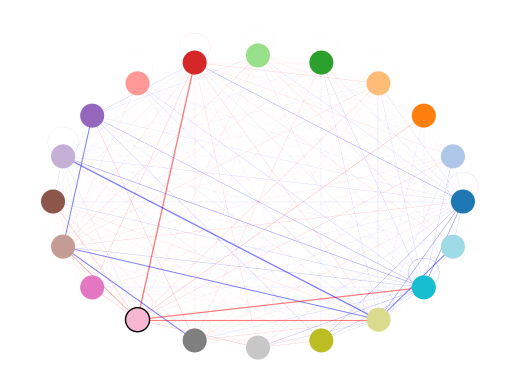

In [28]:
k2m.visualize_motif_graph()

min/max values: -3.8220088175893343 20.453541846313346


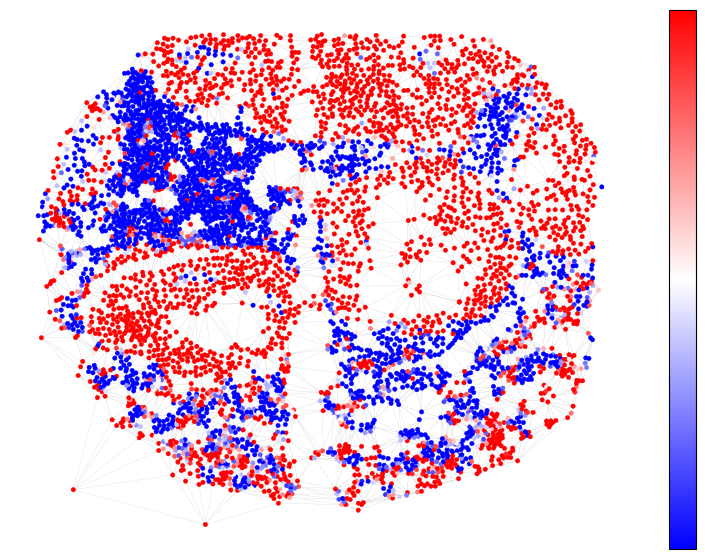

In [30]:
from utils import visualize_cell_graph
_ = visualize_cell_graph(P, key="emb", prospect_flag=True)
# or in future: k2m.visualize_prospect_graph(P)

### Let's train prospector heads!
Use `run_gridsearch` to get models trained

- check how many models are trained

In [1]:
import os
print(len(os.listdir("/scr/gmachi/prospection/K2/notebooks/spatial-bio/outputs/gridsearch_results_final/k2models")))

520
